## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 
#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

In [7]:
import json
def load_data(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return data['nodes'], data['edges']
def build_social_network(nodes, edges):
    network = {}
    for node in nodes:
        network[node[0]] = {'influence': node[1], 'friends': []}
    for edge in edges:
        u, v, weight = edge
        network[u]['friends'].append((v, weight))
        network[v]['friends'].append((u, weight))  
    return network
nodes, edges = load_data(r"C:\Users\asus\Desktop\hw4_data.json")
social_network = build_social_network(nodes, edges)
for user in social_network:
    print(f"{user}: {', '.join([f[0] for f in social_network[user]['friends']])}")

Yanyan-Wang: Aarebecca, pomelo-nwu, yangzy0603, tyn1998, yvonneyx, lidongze0629, RackweLLizm, yikenie, yubo0923, Maple0817, wj23027, frank-zsy, andyhuang18, bifenglin
Aarebecca: Yanyan-Wang, pomelo-nwu, yangzy0603, yvonneyx, lidongze0629, tyn1998, RackweLLizm, yikenie, yubo0923, Maple0817, frank-zsy
pomelo-nwu: Yanyan-Wang, Aarebecca, yangzy0603, tyn1998, lidongze0629, yvonneyx, RackweLLizm, yikenie, bifenglin, frank-zsy, yubo0923, wj23027, andyhuang18, Maple0817, will-ww, zhicheng-ning, PureNatural, xiaoya-yaya, xgdyp, longyanz, Zzzzzhuzhiwei, birdflyi, lhbvvvvv, zhaosj975
tyn1998: andyhuang18, pomelo-nwu, frank-zsy, wj23027, bifenglin, Yanyan-Wang, will-ww, Zzzzzhuzhiwei, lhbvvvvv, zhicheng-ning, PureNatural, yangzy0603, xgdyp, stevending1st, wxharry, Aarebecca, birdflyi, xiaoya-yaya, pranavshuklaa, lidongze0629, yvonneyx, stealth-bombeer, RackweLLizm, yikenie, Vlad116, longyanz, zhaosj975, yubo0923, Maple0817, kunal8411
frank-zsy: tyn1998, Zzzzzhuzhiwei, xgdyp, will-ww, PureNatural,

In [ ]:
def calculate_degrees(network):
    degrees = [(user, len(network[user]['friends'])) for user in network]
    degrees.sort(key=lambda x: x[1], reverse=True)
    return degrees
degrees = calculate_degrees(social_network)
top_5_degrees = degrees[:5]
print("Top 5 users by degree:", top_5_degrees)
def find_top_influence_users(network):
    influences = [(user, network[user]['influence']) for user in network]
    influences.sort(key=lambda x: x[1], reverse=True)
    return influences[:5]
top_5_influences = find_top_influence_users(social_network)
print("Top 5 users by influence score:", top_5_influences)
def combined_influence_and_degree(network, alpha=0.5):
    combined_scores = []
    for user in network:
        degree = len(network[user]['friends'])
        influence = network[user]['influence']
        combined_score = alpha * influence + (1 - alpha) * degree
        combined_scores.append((user, combined_score))
    combined_scores.sort(key=lambda x: x[1], reverse=True)
    return combined_scores[:5]
top_5_combined = combined_influence_and_degree(social_network)
print("Top 5 users by combined score:", top_5_combined)

Top 5 users by degree: [('tyn1998', 30), ('frank-zsy', 30), ('pomelo-nwu', 24), ('andyhuang18', 23), ('wj23027', 23)]
Top 5 users by influence score: [('Yanyan-Wang', 50.95), ('Aarebecca', 23.82), ('pomelo-nwu', 22.36), ('tyn1998', 16.64), ('frank-zsy', 15.8)]
Top 5 users by combined score: [('Yanyan-Wang', 32.475), ('tyn1998', 23.32), ('pomelo-nwu', 23.18), ('frank-zsy', 22.9), ('Aarebecca', 17.41)]


In [ ]:
def recommend_friends(user, network):
    friends = set(f[0] for f in network[user]['friends'])
    potential_friends = set()
    for friend in friends:
        for ff, _ in network[friend]['friends']:
            if ff not in friends and ff != user:
                potential_friends.add(ff)
    return sorted(potential_friends, key=lambda x: len(set(f[0] for f in network[x]['friends']).intersection(friends)), reverse=True)
#朋友的朋友，而且并不是自己的朋友
recommended_friends = recommend_friends('Yanyan-Wang', social_network)
print("Recommended new friends for Yanyan-Wang:", recommended_friends)
def recommend_friends_by_strength(user, network, n=5):
    friends_with_strength = sorted(network[user]['friends'], key=lambda x: x[1], reverse=True)[:n]
    return [f[0] for f in friends_with_strength]
#直接朋友的关系强度前五
strongest_connections = recommend_friends_by_strength('Yanyan-Wang', social_network)
print("Strongest connections for Yanyan-Wang:", strongest_connections)

Recommended new friends for Yanyan-Wang: ['xgdyp', 'PureNatural', 'xiaoya-yaya', 'Zzzzzhuzhiwei', 'birdflyi', 'zhaosj975', 'will-ww', 'lhbvvvvv', 'longyanz', 'zhicheng-ning', 'stevending1st', 'wxharry', 'pranavshuklaa', 'Vlad116', 'stealth-bombeer', 'kunal8411']
Strongest connections for Yanyan-Wang: ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx']


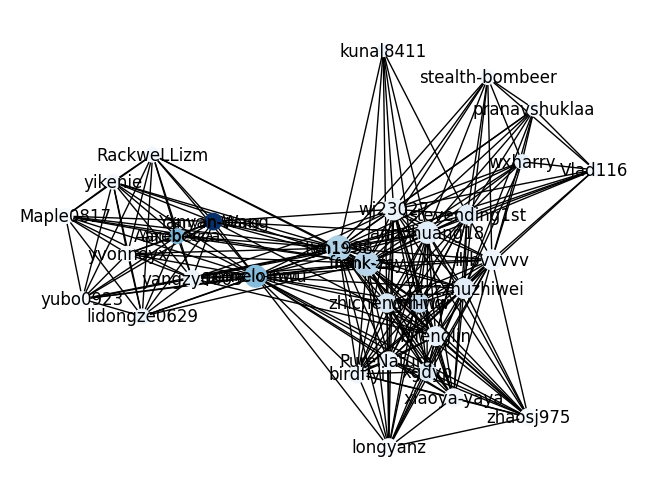

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_network(network, top_users):
    G = nx.Graph()
    for user in network:
        G.add_node(user, size=len(network[user]['friends']), color=network[user]['influence'])
        for friend, weight in network[user]['friends']:
            G.add_edge(user, friend, weight=weight)
    
    pos = nx.spring_layout(G)
    sizes = [G.nodes[node]['size']*10 for node in G.nodes()]
    colors = [G.nodes[node]['color'] for node in G.nodes()]
    nx.draw(G, pos, node_size=sizes, node_color=colors, cmap=plt.cm.Blues, with_labels=True)
    labels = {user: user if user in top_users else '' for user in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_color='black')
    plt.show()

# 可视化网络
visualize_network(social_network, [user for user, _ in top_5_combined])